<a href="https://colab.research.google.com/github/mehmedkadric/anomaly-detection-platform/blob/main/Anomaly_Detection_Book_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import random

In [ ]:
import pickle

# Generate fake data

When you run this code, it will generate the data and then display three subplots showing the histograms of the distributions for time_data, price_data, and pages_data, respectively. Additionally, the PDF curves for each distribution are plotted as red lines on top of the histograms, providing a visual representation of the data distribution.

In [ ]:
# Define the patterns
genre_page_patterns = {
    'fiction': (200, 401),
    'mystery': (150, 401),
    'romance': (100, 501),
    'non-fiction': (50, 801)
}

genre_price_patterns = {
    'fiction': (10, 30),
    'mystery': (15, 40),
    'romance': (5, 50),
    'non-fiction': (20, 60)
}

time_page_patterns = {
    'peak': (50, 601),
    'off-peak': (25, 751)
}

price_page_patterns = {
    'low': (50, 200),
    'high': (600, 1000)
}

# Generate synthetic data
num_data_points = 200

# Generate time_data following a normal distribution
time_mean = 12
time_std = 3
time_data = np.random.normal(loc=time_mean, scale=time_std, size=num_data_points)
time_data = np.clip(time_data, 0, 24)

fake_data = []
for i in range(num_data_points):
    genre = random.choice(['fiction', 'mystery', 'romance', 'non-fiction'])
    price = random.randint(*genre_price_patterns[genre])
    pages = random.randint(*genre_page_patterns[genre])
    time = random.choice(['peak', 'off-peak'])

    data_point = {
        'time': f"{int(time_data[i]):02d}:00-{int(time_data[i])+1:02d}:00",
        'genre': genre,
        'price': price,
        'pages': pages
    }
    fake_data.append(data_point)

# Introduce anomalies based on specific rules
num_anomalies = int(num_data_points * 0.05)  # 5% anomalies
for i in range(num_anomalies):
    genre = random.choice(['fiction', 'mystery', 'romance', 'non-fiction'])

    # Introduce anomalies based on the defined patterns for each genre
    if random.random() < 0.5:
        price = random.randint(*price_page_patterns['low'])
    else:
        price = random.randint(*price_page_patterns['high'])

    if random.random() < 0.5:
        pages = random.randint(*time_page_patterns['off-peak'])
    else:
        pages = random.randint(*time_page_patterns['peak'])

    data_point = {
        'time': f"{int(time_data[i]):02d}:00-{int(time_data[i])+1:02d}:00",
        'genre': genre,
        'price': price,
        'pages': pages
    }
    fake_data.append(data_point)


# Print the generated dataset with anomalies
for i, data_point in enumerate(fake_data, 1):
    print(f"{i}. {data_point}")


1. {'time': '14:00-15:00', 'genre': 'fiction', 'price': 21, 'pages': 255}
2. {'time': '13:00-14:00', 'genre': 'romance', 'price': 24, 'pages': 139}
3. {'time': '08:00-09:00', 'genre': 'mystery', 'price': 28, 'pages': 310}
4. {'time': '10:00-11:00', 'genre': 'romance', 'price': 19, 'pages': 250}
5. {'time': '11:00-12:00', 'genre': 'romance', 'price': 49, 'pages': 330}
6. {'time': '09:00-10:00', 'genre': 'non-fiction', 'price': 33, 'pages': 649}
7. {'time': '06:00-07:00', 'genre': 'romance', 'price': 29, 'pages': 129}
8. {'time': '09:00-10:00', 'genre': 'fiction', 'price': 28, 'pages': 392}
9. {'time': '09:00-10:00', 'genre': 'fiction', 'price': 18, 'pages': 382}
10. {'time': '11:00-12:00', 'genre': 'non-fiction', 'price': 33, 'pages': 287}
11. {'time': '10:00-11:00', 'genre': 'romance', 'price': 14, 'pages': 159}
12. {'time': '12:00-13:00', 'genre': 'mystery', 'price': 39, 'pages': 178}
13. {'time': '09:00-10:00', 'genre': 'romance', 'price': 25, 'pages': 266}
14. {'time': '13:00-14:00'

In [ ]:
from collections import defaultdict

# Calculate frequency of generated genres
genre_frequency = defaultdict(int)
for data_point in fake_data:
    genre_frequency[data_point['genre']] += 1

print("\nFrequency of generated genres:")
for genre, frequency in genre_frequency.items():
    print(f"{genre}: {frequency} occurrences")

# Calculate Min, Max, and Avg price, pages, and time per genre
genre_prices = defaultdict(list)
genre_pages = defaultdict(list)
genre_times = defaultdict(list)

for data_point in fake_data:
    genre = data_point['genre']
    genre_prices[genre].append(data_point['price'])
    genre_pages[genre].append(data_point['pages'])

    time_start = data_point['time'].split('-')[0]
    genre_times[genre].append(time_start)

print("\nMin, Max, and Avg price per genre:")
for genre, prices in genre_prices.items():
    min_price = min(prices)
    max_price = max(prices)
    avg_price = sum(prices) / len(prices)
    print(f"{genre}: Min=${min_price}, Max=${max_price}, Avg=${avg_price:.2f}")

print("\nMin, Max, and Avg pages per genre:")
for genre, pages in genre_pages.items():
    min_pages = min(pages)
    max_pages = max(pages)
    avg_pages = sum(pages) / len(pages)
    print(f"{genre}: Min={min_pages} pages, Max={max_pages} pages, Avg={avg_pages:.2f} pages")



Frequency of generated genres:
fiction: 53 occurrences
romance: 57 occurrences
mystery: 48 occurrences
non-fiction: 52 occurrences

Min, Max, and Avg price per genre:
fiction: Min=$10, Max=$814, Avg=$77.42
romance: Min=$5, Max=$200, Avg=$27.21
mystery: Min=$15, Max=$139, Avg=$32.71
non-fiction: Min=$20, Max=$670, Avg=$52.44

Min, Max, and Avg pages per genre:
fiction: Min=55 pages, Max=706 pages, Avg=295.75 pages
romance: Min=51 pages, Max=496 pages, Avg=285.07 pages
mystery: Min=77 pages, Max=578 pages, Avg=274.83 pages
non-fiction: Min=59 pages, Max=795 pages, Avg=411.04 pages


# Display PDFs

When you run this code, it will generate the data and then display three subplots showing the histograms of the distributions for time_data, price_data, and pages_data, respectively. Additionally, the PDF curves for each distribution are plotted as red lines on top of the histograms, providing a visual representation of the normal distribution.

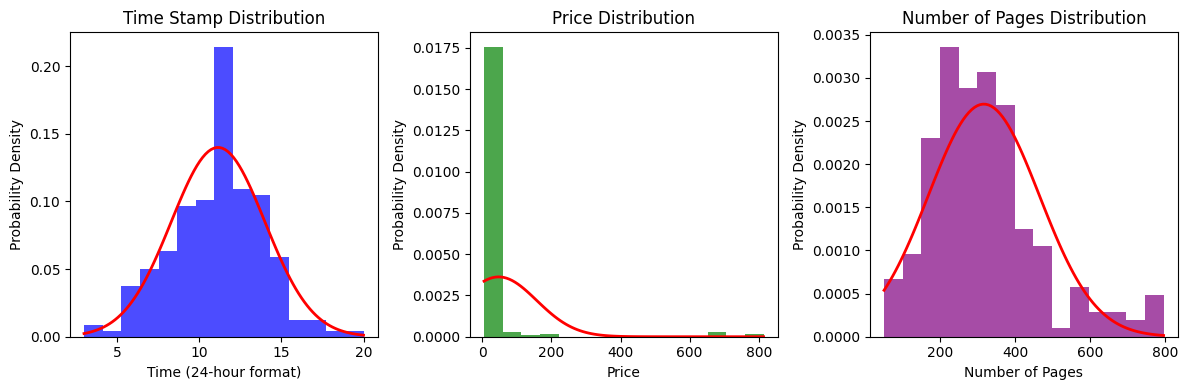

In [ ]:
# Extract separate lists for time_data, price, and pages
time_data_numeric = [float(data_point['time'].split('-')[0].split(":")[0]) for data_point in fake_data]
price = [data_point['price'] for data_point in fake_data]
pages = [data_point['pages'] for data_point in fake_data]

def plot_distributions(time_data, price_data, pages_data):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    # Plot time_data distribution
    axes[0].hist(time_data, bins=15, density=True, color='blue', alpha=0.7)
    axes[0].set_title('Time Stamp Distribution')
    axes[0].set_xlabel('Time (24-hour format)')
    axes[0].set_ylabel('Probability Density')

    # Plot price_data distribution
    axes[1].hist(price_data, bins=15, density=True, color='green', alpha=0.7)
    axes[1].set_title('Price Distribution')
    axes[1].set_xlabel('Price')
    axes[1].set_ylabel('Probability Density')

    # Plot pages_data distribution
    axes[2].hist(pages_data, bins=15, density=True, color='purple', alpha=0.7)
    axes[2].set_title('Number of Pages Distribution')
    axes[2].set_xlabel('Number of Pages')
    axes[2].set_ylabel('Probability Density')

    # Add PDF curves to the plots
    x_range = np.linspace(min(time_data), max(time_data), 100)
    time_pdf = stats.norm.pdf(x_range, np.mean(time_data), np.std(time_data))
    axes[0].plot(x_range, time_pdf, 'r-', linewidth=2)

    x_range = np.linspace(min(price_data), max(price_data), 100)
    price_pdf = stats.norm.pdf(x_range, np.mean(price_data), np.std(price_data))
    axes[1].plot(x_range, price_pdf, 'r-', linewidth=2)

    x_range = np.linspace(min(pages_data), max(pages_data), 100)
    pages_pdf = stats.norm.pdf(x_range, np.mean(pages_data), np.std(pages_data))
    axes[2].plot(x_range, pages_pdf, 'r-', linewidth=2)

    plt.tight_layout()
    plt.show()

plot_distributions(time_data_numeric, price, pages)

# Anomaly detection - IsolationForest

In this code, we use the [Isolation Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) algorithm from the scikit-learn library to perform anomaly detection. Here's a breakdown of the steps:


1.   We convert the dataset into a numerical matrix X where each row represents a data point with numerical features (price and pages).
2. We create an instance of the IsolationForest model, adjusting the *contamination* parameter based on your desired threshold for what is considered an anomaly. This parameter determines the expected proportion of anomalies in the data.
3. We fit the Isolation Forest model to the dataset by calling the `fit()` method.
4. We use the `decision_function()` method to obtain anomaly scores for each data point. The anomaly score represents the model's confidence in classifying a point as an anomaly.
5. We use the `predict()` method to obtain the binary predictions (-1 for anomalies and 1 for normal points).
6. Finally, we print the original data, anomaly scores, and predictions to analyze the results.

By running this code, you'll get the anomaly scores and predictions for each data point in your dataset. Anomalies are indicated by a prediction value of -1. You can adjust the threshold for anomaly detection by tuning the *contamination* parameter.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode the 'time' feature
time_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
time_encoded = time_encoder.fit_transform([[d['time']] for d in fake_data])

# Label encode the 'genre' feature
genre_encoder = LabelEncoder()
genre_encoded = genre_encoder.fit_transform([d['genre'] for d in fake_data])

# Concatenate 'price', 'pages', one-hot encoded 'time', and label encoded 'genre' into X
X = [[d['price'], d['pages']] + list(time_encoded[i]) + [genre_encoded[i]] for i, d in enumerate(fake_data)]
X = np.array(X)
# Train the Isolation Forest model

# Parameter 'contamination': ‘auto’ or float, default=’auto’
# The amount of contamination of the data set,
# i.e. the proportion of outliers in the data set.
# Used when fitting to define the threshold on the scores of the samples.

isolationforest_model = IsolationForest(contamination=0.1)
# isolationforest_model = IsolationForest()  # contamination: auto
isolationforest_model.fit(X)

# Predict the anomalies
anomaly_scores = isolationforest_model.decision_function(X)
isolationforest_predictions = isolationforest_model.predict(X)

# Print the anomaly scores and predictions
isolationforest_anomalies = []
for i in range(len(fake_data)):
    if isolationforest_predictions[i] == -1:  # Anomalies are indicated by a prediction value of -1
      print(fake_data[i])
      isolationforest_anomalies.append(fake_data[i])


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


{'time': '06:00-07:00', 'genre': 'non-fiction', 'price': 43, 'pages': 777}
{'time': '17:00-18:00', 'genre': 'fiction', 'price': 10, 'pages': 250}
{'time': '03:00-04:00', 'genre': 'romance', 'price': 24, 'pages': 153}
{'time': '17:00-18:00', 'genre': 'non-fiction', 'price': 20, 'pages': 237}
{'time': '16:00-17:00', 'genre': 'romance', 'price': 32, 'pages': 279}
{'time': '05:00-06:00', 'genre': 'non-fiction', 'price': 52, 'pages': 641}
{'time': '11:00-12:00', 'genre': 'non-fiction', 'price': 50, 'pages': 795}
{'time': '10:00-11:00', 'genre': 'non-fiction', 'price': 37, 'pages': 751}
{'time': '20:00-21:00', 'genre': 'non-fiction', 'price': 20, 'pages': 660}
{'time': '14:00-15:00', 'genre': 'non-fiction', 'price': 40, 'pages': 781}
{'time': '16:00-17:00', 'genre': 'non-fiction', 'price': 41, 'pages': 112}
{'time': '16:00-17:00', 'genre': 'romance', 'price': 9, 'pages': 492}
{'time': '17:00-18:00', 'genre': 'romance', 'price': 48, 'pages': 403}
{'time': '04:00-05:00', 'genre': 'romance', 'p

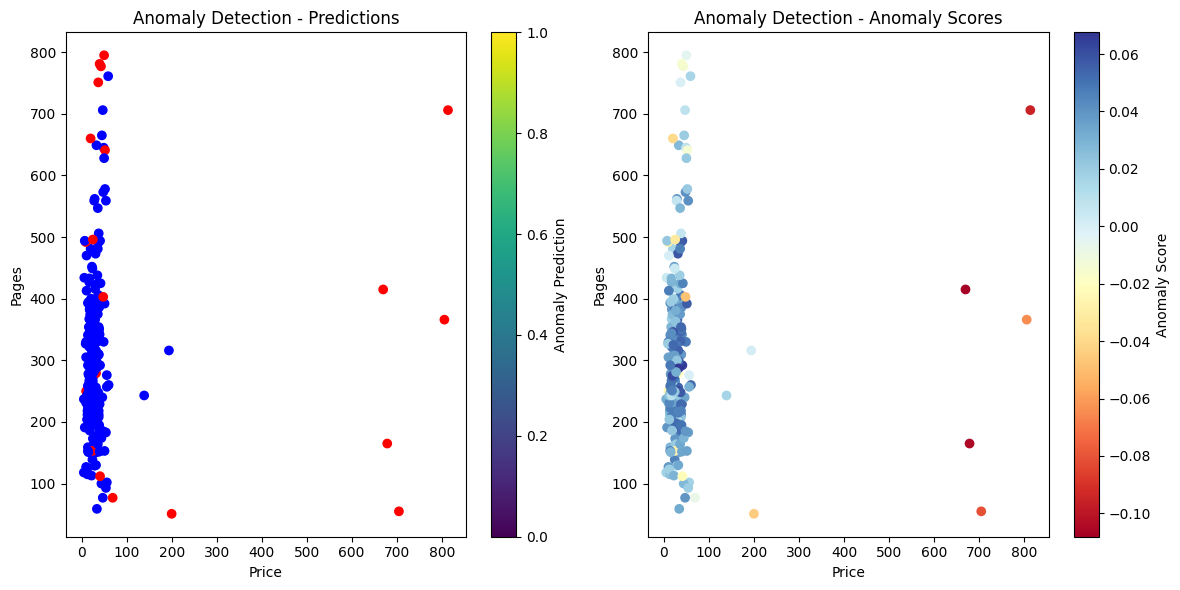

In [ ]:
# Create subplots for anomaly predictions and anomaly scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# X = [[d['price'], d['pages']] for d in fake_data]
# Plot anomaly predictions

ax1.scatter([x[0] for x in X], [x[1] for x in X], c=['red' if pred == -1 else 'blue' for pred in isolationforest_predictions])
ax1.set_xlabel('Price')
ax1.set_ylabel('Pages')
ax1.set_title('Anomaly Detection - Predictions')

# Plot anomaly scores
ax2.scatter([x[0] for x in X], [x[1] for x in X], c=anomaly_scores, cmap='RdYlBu')
ax2.set_xlabel('Price')
ax2.set_ylabel('Pages')
ax2.set_title('Anomaly Detection - Anomaly Scores')

# Add colorbars to indicate the anomaly predictions and anomaly scores
cbar1 = fig.colorbar(ax1.collections[0], ax=ax1)
cbar1.set_label('Anomaly Prediction')

cbar2 = fig.colorbar(ax2.collections[0], ax=ax2)
cbar2.set_label('Anomaly Score')

plt.tight_layout()
plt.show()



*   *predictions* - Predict if a particular sample is an outlier (-1) or not (1).
*   *anomaly_score* - The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest. More info [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html).



# Anomaly detection - GaussianMixture

In this code, we use a [Gaussian mixture model](https://scikit-learn.org/stable/modules/mixture.html) (GMM) from scikit-learn to perform anomaly detection. Here's a breakdown of the steps:

1. We convert the dataset into a numerical matrix X where each row represents a data point with numerical features (price and pages).
2. We create an instance of the GaussianMixture model, specifying the desired number of components (clusters). You can adjust the *n_components* parameter based on your dataset and desired complexity.
3. We fit the Gaussian Mixture Model to the dataset by calling the `fit()` method.
4. We calculate the log-likelihood of each data point using the `score_samples()` method. The log-likelihood represents the model's assessment of how likely each point is to belong to the learned distribution.
5. We define a threshold for anomaly detection by setting it to a low percentile of the log-likelihood values. In this example, we use the 5th percentile `(np.percentile(log_likelihoods, 5))` as the threshold.
6. We predict the anomalies by comparing the log-likelihoods with the threshold and assigning True to points that fall below the threshold.
7. Finally, we plot the data, emphasizing the anomalies by assigning different colors to them. Blue points represent normal data, while red points represent anomalies. A legend is added to differentiate between the two.

You can adjust the number of components (*n_components*) in the GMM and the percentile used for the threshold to suit your specific needs.

In [ ]:
from sklearn.mixture import GaussianMixture

# Train the Gaussian Mixture Model
model = GaussianMixture(n_components=1)  # Adjust the number of components as needed
model.fit(X)

# Calculate the log-likelihood of each data point
log_likelihoods = model.score_samples(X)

# Define the threshold for anomaly detection
threshold = np.percentile(log_likelihoods, 7)  # Adjust the percentile as needed

# Predict the anomalies
gaussianmixture_predictions = log_likelihoods < threshold

# Print the detected anomalies
print("Detected Anomalies:")
gaussianmixture_anomalies = []
for i, point in enumerate(fake_data):
    if gaussianmixture_predictions[i]:
        print(point)
        gaussianmixture_anomalies.append(point)

Detected Anomalies:
{'time': '17:00-18:00', 'genre': 'fiction', 'price': 10, 'pages': 250}
{'time': '03:00-04:00', 'genre': 'romance', 'price': 24, 'pages': 153}
{'time': '17:00-18:00', 'genre': 'non-fiction', 'price': 20, 'pages': 237}
{'time': '16:00-17:00', 'genre': 'romance', 'price': 32, 'pages': 279}
{'time': '05:00-06:00', 'genre': 'non-fiction', 'price': 52, 'pages': 641}
{'time': '20:00-21:00', 'genre': 'non-fiction', 'price': 20, 'pages': 660}
{'time': '16:00-17:00', 'genre': 'non-fiction', 'price': 41, 'pages': 112}
{'time': '16:00-17:00', 'genre': 'romance', 'price': 9, 'pages': 492}
{'time': '17:00-18:00', 'genre': 'romance', 'price': 48, 'pages': 403}
{'time': '18:00-19:00', 'genre': 'non-fiction', 'price': 24, 'pages': 449}
{'time': '04:00-05:00', 'genre': 'romance', 'price': 25, 'pages': 496}
{'time': '08:00-09:00', 'genre': 'non-fiction', 'price': 670, 'pages': 415}
{'time': '10:00-11:00', 'genre': 'fiction', 'price': 679, 'pages': 165}
{'time': '09:00-10:00', 'genre':

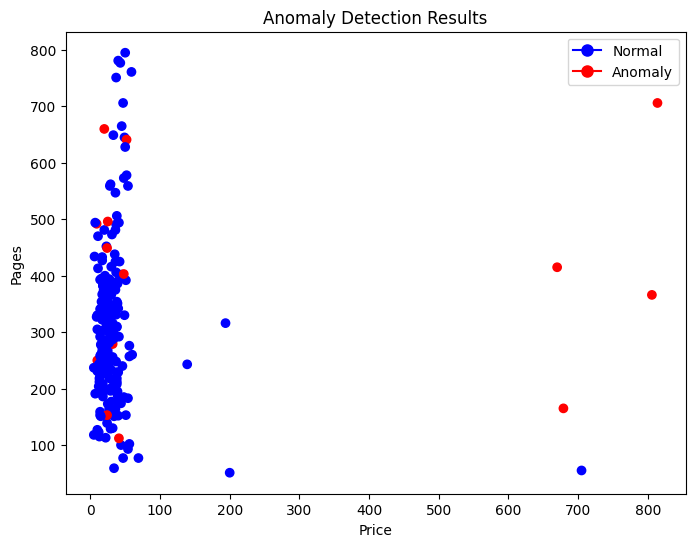

In [ ]:
# Plot the data with emphasis on anomalies
X = np.array(X)
plt.figure(figsize=(8, 6))
colors = ['red' if pred else 'blue' for pred in gaussianmixture_predictions]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel('Price')
plt.ylabel('Pages')
plt.title('Anomaly Detection Results')

# Add a legend
normal_patch = plt.Line2D([], [], marker='o', markersize=8, color='blue', label='Normal')
anomaly_patch = plt.Line2D([], [], marker='o', markersize=8, color='red', label='Anomaly')
plt.legend(handles=[normal_patch, anomaly_patch])

plt.show()

# Anomaly detection - OneClassSVM

In this code, we utilize the [One-Class SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) algorithm from scikit-learn for anomaly detection. Here's a breakdown of the steps:
1. We convert the dataset into a numerical matrix X where each row represents a data point with numerical features (price and pages).
2. We create an instance of the OneClassSVM model, adjusting the *nu* parameter as needed. The *nu* parameter controls the proportion of outliers expected in the data.
3. We fit the One-Class SVM model to the dataset by calling the `fit()` method.
4. We use the `predict()` method to obtain the binary predictions (-1 for anomalies and 1 for normal points).
5. We plot the data points with emphasis on the anomalies by assigning different colors based on the predictions. Blue points represent normal data, while red points represent anomalies.
6. A legend is added to the plot to differentiate between normal and anomalous data points.

You can adjust the *nu* parameter to control the threshold for anomaly detection. Higher values of *nu* allow more data points to be classified as anomalies, while lower values make the model more strict in classifying anomalies.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import OneClassSVM

# Train the One-Class SVM model
# An upper bound on the fraction of training errors and a lower bound
# of the fraction of support vectors. Should be in the interval (0, 1].
# By default 0.5 will be taken.
oneclasssvm_model = OneClassSVM(nu=0.1)  # Adjust the nu parameter as needed
oneclasssvm_model.fit(X)

# Predict the anomalies
oneclasssvm_predictions = oneclasssvm_model.predict(X)

# Print the predicted anomalies
oneclasssvm_anomalies = []
print("Predicted Anomalies:")
for i, point in enumerate(fake_data):
    if oneclasssvm_predictions[i] == -1:
        oneclasssvm_anomalies.append(point)
        print(point)

# with open('genre_encoder.pkl', 'wb') as file:
#     pickle.dump(genre_encoder, file)
#
# from google.colab import files
# files.download('genre_encoder.pkl')

Predicted Anomalies:
{'time': '15:00-16:00', 'genre': 'non-fiction', 'price': 59, 'pages': 761}
{'time': '13:00-14:00', 'genre': 'non-fiction', 'price': 47, 'pages': 77}
{'time': '06:00-07:00', 'genre': 'non-fiction', 'price': 43, 'pages': 777}
{'time': '10:00-11:00', 'genre': 'non-fiction', 'price': 47, 'pages': 706}
{'time': '13:00-14:00', 'genre': 'non-fiction', 'price': 34, 'pages': 59}
{'time': '08:00-09:00', 'genre': 'romance', 'price': 6, 'pages': 434}
{'time': '14:00-15:00', 'genre': 'romance', 'price': 5, 'pages': 118}
{'time': '12:00-13:00', 'genre': 'romance', 'price': 13, 'pages': 115}
{'time': '11:00-12:00', 'genre': 'non-fiction', 'price': 50, 'pages': 795}
{'time': '10:00-11:00', 'genre': 'non-fiction', 'price': 37, 'pages': 751}
{'time': '14:00-15:00', 'genre': 'non-fiction', 'price': 40, 'pages': 781}
{'time': '10:00-11:00', 'genre': 'non-fiction', 'price': 54, 'pages': 93}
{'time': '16:00-17:00', 'genre': 'romance', 'price': 9, 'pages': 492}
{'time': '09:00-10:00', 'g

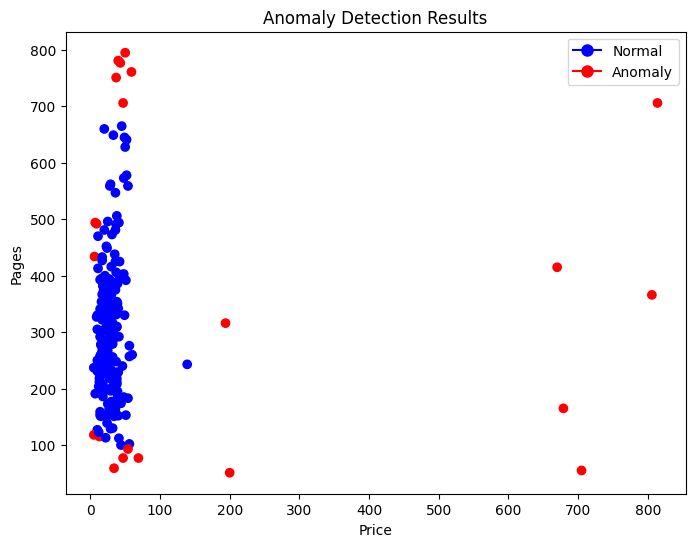

In [ ]:
# Plot the data with emphasis on anomalies
X = np.array(X)
plt.figure(figsize=(8, 6))
colors = ['blue' if pred == 1 else 'red' for pred in oneclasssvm_predictions]
plt.scatter(X[:, 0], X[:, 1], c=colors)
plt.xlabel('Price')
plt.ylabel('Pages')
plt.title('Anomaly Detection Results')

# Add a legend
normal_patch = plt.Line2D([], [], marker='o', markersize=8, color='blue', label='Normal')
anomaly_patch = plt.Line2D([], [], marker='o', markersize=8, color='red', label='Anomaly')
plt.legend(handles=[normal_patch, anomaly_patch])

plt.show()

# Comparison

When it comes to anomaly detection, different algorithms have their own strengths and weaknesses. Let's compare the three algorithms used in this analysis: Isolation Forest, Gaussian Mixture, and One-Class SVM.


## Isolation Forest

**Pros:**
- Effective in detecting anomalies in high-dimensional data.
- Does not require prior assumptions about the data distribution.
- Can handle outliers and anomalies that deviate from the majority of the data.

**Cons:**
- May struggle with datasets containing overlapping clusters.
- Can be sensitive to the `contamination` parameter, requiring tuning for optimal results.
- May generate false positives if the dataset has a high proportion of anomalies.

## Gaussian Mixture

**Pros:**
- Flexible and capable of capturing complex data distributions.
- Allows for probabilistic interpretation of anomaly scores.
- Performs well when the data follows a mixture of Gaussian distributions.

**Cons:**
- Assumes that the data distribution can be approximated as a mixture of Gaussian distributions.
- May be computationally expensive for large datasets.
- Requires tuning of the number of components and other parameters.

## One-Class SVM

**Pros:**
- Effective for detecting anomalies in high-dimensional data.
- Can handle non-linear boundaries and complex data distributions.
- Offers flexibility in controlling the threshold for anomaly detection with the `nu` parameter.

**Cons:**
- Sensitive to the `nu` parameter, requiring careful tuning for optimal results.
- Can be computationally expensive, especially for large datasets.
- May struggle with datasets that have overlapping or complex boundaries.


## Results Comparison

Now, let's compare the results of the three algorithms on our dataset:

- Isolation Forest (`contamination=0.1`):
  - Detected anomalies: 10
- Gaussian Mixture (`n_components=1`, `percentile=7`):
  - Detected anomalies: 7
- One-Class SVM (`nu=0.1`):
  - Detected anomalies: 9




In [ ]:
print("IsolationForest Anomalies:", len(isolationforest_anomalies))
for anomaly in isolationforest_anomalies:
  print(anomaly)
print("GaussianMixture Anomalies:", len(gaussianmixture_anomalies))
for anomaly in gaussianmixture_anomalies:
  print(anomaly)
print("OneClassSVM Anomalies:", len(oneclasssvm_anomalies))
for anomaly in oneclasssvm_anomalies:
  print(anomaly)

IsolationForest Anomalies: 21
{'time': '06:00-07:00', 'genre': 'non-fiction', 'price': 43, 'pages': 777}
{'time': '17:00-18:00', 'genre': 'fiction', 'price': 10, 'pages': 250}
{'time': '03:00-04:00', 'genre': 'romance', 'price': 24, 'pages': 153}
{'time': '17:00-18:00', 'genre': 'non-fiction', 'price': 20, 'pages': 237}
{'time': '16:00-17:00', 'genre': 'romance', 'price': 32, 'pages': 279}
{'time': '05:00-06:00', 'genre': 'non-fiction', 'price': 52, 'pages': 641}
{'time': '11:00-12:00', 'genre': 'non-fiction', 'price': 50, 'pages': 795}
{'time': '10:00-11:00', 'genre': 'non-fiction', 'price': 37, 'pages': 751}
{'time': '20:00-21:00', 'genre': 'non-fiction', 'price': 20, 'pages': 660}
{'time': '14:00-15:00', 'genre': 'non-fiction', 'price': 40, 'pages': 781}
{'time': '16:00-17:00', 'genre': 'non-fiction', 'price': 41, 'pages': 112}
{'time': '16:00-17:00', 'genre': 'romance', 'price': 9, 'pages': 492}
{'time': '17:00-18:00', 'genre': 'romance', 'price': 48, 'pages': 403}
{'time': '04:00-

In [ ]:
# Convert each dictionary in the lists to a tuple of its items
tuple_isolationforest = [tuple(d.items()) for d in isolationforest_anomalies]
tuple_gaussianmixture = [tuple(d.items()) for d in gaussianmixture_anomalies]
tuple_oneclasssvm = [tuple(d.items()) for d in oneclasssvm_anomalies]

# Convert each list of tuples to sets
set_isolationforest = set(tuple_isolationforest)
set_gaussianmixture = set(tuple_gaussianmixture)
set_oneclasssvm = set(tuple_oneclasssvm)

# Find the number of shared elements between each pair of sets
shared_isolation_gaussian = len(set_isolationforest.intersection(set_gaussianmixture))
shared_isolation_oneclasssvm = len(set_isolationforest.intersection(set_oneclasssvm))
shared_gaussian_oneclasssvm = len(set_gaussianmixture.intersection(set_oneclasssvm))

# Print the results
print("Number of shared elements between IsolationForest and GaussianMixture:", shared_isolation_gaussian)
print("Number of shared elements between IsolationForest and OneClassSVM:", shared_isolation_oneclasssvm)
print("Number of shared elements between GaussianMixture and OneClassSVM:", shared_gaussian_oneclasssvm)

Number of shared elements between IsolationForest and GaussianMixture: 14
Number of shared elements between IsolationForest and OneClassSVM: 12
Number of shared elements between GaussianMixture and OneClassSVM: 5


# Conclusion

Overall, all three algorithms were able to identify anomalies in the dataset, but the specific anomalies detected may differ due to the variations in the algorithms' underlying assumptions and techniques.

- Isolation Forest flagged 21/210 data points as anomalous.
- Gaussian Mixture identified 15 anomalies. 14 overlap with the anomalies detected by Isolation Forest.
- One-Class SVM detected 22 anomalies, with 12 of them overlapping with the anomalies identified by IsolationForest model.

It's worth noting that the choice of algorithm and its parameter settings should depend on the specific characteristics and requirements of the dataset and the anomaly detection task at hand. Experimenting with different algorithms and tuning their parameters can help fine-tune the anomaly detection process for optimal results.

Please note that the effectiveness of the anomaly detection algorithms heavily relies on the quality and representativeness of the dataset used for training and evaluation. Additionally, domain knowledge and further analysis are crucial in interpreting and validating the detected anomalies.
